In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy import stats
from scipy.stats import f_oneway, kruskal
from math import sqrt

import wrangle
import explore

import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
pd.options.mode.chained_assignment = None  # default='warn'

In [2]:
df, train_exp, X_train_scaled, y_train, X_test_scaled, y_test = wrangle.wrangle_dallas_data()
df.shape, train_exp.shape, X_train_scaled.shape, y_train.shape, X_test_scaled.shape, y_test.shape

Acquire: compiling raw data files...
Acquire: Completed!
Prepare: preparing data files...
Prepare: Completed!
(246, 40) (62, 40)


((308, 41), (246, 41), (246, 37), (246, 1), (62, 37), (62, 1))

## Explore Functions

In [3]:
from sklearn.cluster import KMeans

# ##################################################################################################################

# def r2(x, y):
#     '''
#     Takes in x and y and returns pearsons correlation coefficent
#     '''
#     return stats.pearsonr(x, y)[0] ** 2

# ##################################################################################################################

# def elbow_plot(X_train_scaled, cluster_vars):
#     '''
#     Given X_train and cluster variables plots an elbow_plot
#     '''
#     # elbow method to identify good k for us
#     ks = range(1,10)
    
#     # empty list to hold inertia (sum of squares)
#     sse = []

#     # loop through each k, fit kmeans, get inertia
#     for k in ks:
#         kmeans = KMeans(n_clusters=k)
#         kmeans.fit(X_train_scaled[cluster_vars])
#         # inertia
#         sse.append(kmeans.inertia_)

#     print(pd.DataFrame(dict(k=ks, sse=sse)))

#     # plot k with inertia
#     plt.plot(ks, sse, 'bx-')
#     plt.xlabel('k')
#     plt.ylabel('SSE')
#     plt.title('Elbow method to find optimal k')
#     plt.show()

# ##################################################################################################################

# def run_kmeans(X_train, X_train_scaled, k, cluster_vars, cluster_col_name):
#     '''
#     Creates a kemeans object and creates a dataframe with cluster information
#     '''
#     # create kmeans object
#     kmeans = KMeans(n_clusters = k, random_state = 13)
#     kmeans.fit(X_train_scaled[cluster_vars])
#     # predict and create a dataframe with cluster per observation
#     train_clusters = \
#         pd.DataFrame(kmeans.predict(X_train_scaled[cluster_vars]),
#                               columns=[cluster_col_name],
#                               index=X_train.index)
    
#     return train_clusters, kmeans

# ##################################################################################################################

# def kmeans_transform(X_scaled, kmeans, cluster_vars, cluster_col_name):
#     '''
#     Takes in a dataframe and returns custers that have been predicted on that dataframe
#     '''
#     kmeans.transform(X_scaled[cluster_vars])
#     trans_clusters = \
#         pd.DataFrame(kmeans.predict(X_scaled[cluster_vars]),
#                               columns=[cluster_col_name],
#                               index=X_scaled.index)
    
#     return trans_clusters

# ##################################################################################################################

# def get_centroids(cluster_vars, cluster_col_name, kmeans):
#     '''
#     Takes in kmeans and cluster variables to produce centroids
#     '''
#     centroid_col_names = ['centroid_' + i for i in cluster_vars]

#     centroids = pd.DataFrame(kmeans.cluster_centers_, 
#              columns=centroid_col_names).reset_index().rename(columns={'index': cluster_col_name})
    
#     return centroids

# ##################################################################################################################

# def add_to_train(train_clusters, centroids, X_train_scaled, cluster_col_name):
#     '''
#     Takes in a datafrme, clusters, centroids and returns a new dataframe with all information concated together
#     '''
#     # concatenate cluster id
#     X_train2 = pd.concat([X_train_scaled, train_clusters], axis=1)

#     # join on clusterid to get centroids
#     X_train2 = X_train2.merge(centroids, how='left', 
#                             on=cluster_col_name).\
#                         set_index(X_train_scaled.index)
    
#     return X_train2

# ##################################################################################################################

## Clustering In Dallas

**Takeaway**: 
`Features that demonstrate potential for Clustering`

1. E_POV (Persons below poverty estimate)
2. EP_POV (Percentage of persons below poverty estimate)
3. SPL_THEME1 (Sum of series for Socioeconomic theme)

*Very few features are affective in classifying SVI groups.  Suggests COVID affects all groups equally in Dallas*

In [4]:
# def cluster_scatter(df, title, col_x, col_x_title, col_y, col_y_title, hue = "bin_svi"):
#     plt.figure(figsize=(12,8))
#     sns.scatterplot(x= col_x, 
#                     y= col_y,
#                     data = df, hue= hue,
#                     legend = True)
#     plt.rc('font', size=16)
#     plt.title(title)
#     plt.ylabel(col_y_title,labelpad=20)
#     plt.xlabel(col_x_title,labelpad=20)
#     plt.ylim([-1000, 15000])
#     plt.tight_layout()
#     plt.show()

Acquire: compiling raw data files...
Acquire: Completed!
Prepare: preparing data files...
Prepare: Completed!
(246, 40) (62, 40)


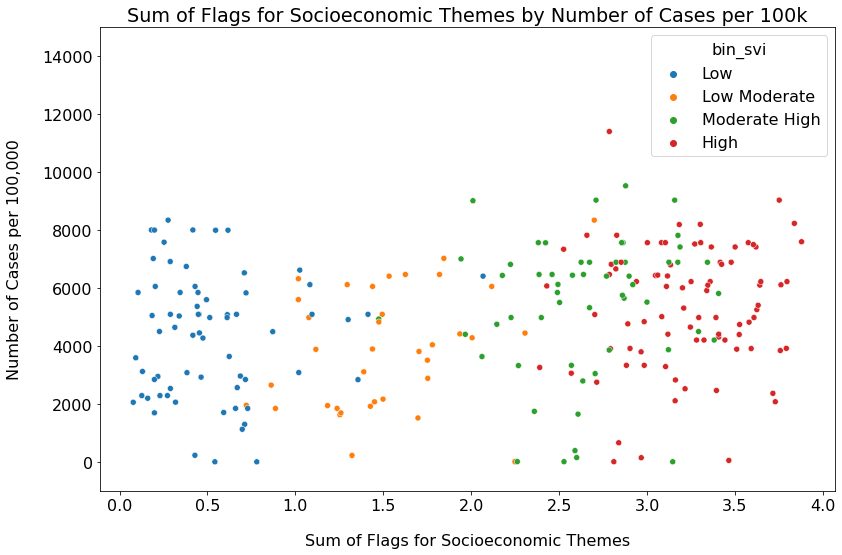

In [5]:
df, train_exp, X_train_scaled, y_train, X_test_scaled, y_test = wrangle.wrangle_dallas_data()
explore.cluster_scatter(train_exp, 
                'Sum of Flags for Socioeconomic Themes by Number of Cases per 100k', 
                'spl_theme1',
                'Sum of Flags for Socioeconomic Themes',
                'tract_cases_per_100k',
                'Number of Cases per 100,000')

#### Scatterplot spl_theme1

Acquire: compiling raw data files...
Acquire: Completed!
Prepare: preparing data files...
Prepare: Completed!
(246, 40) (62, 40)


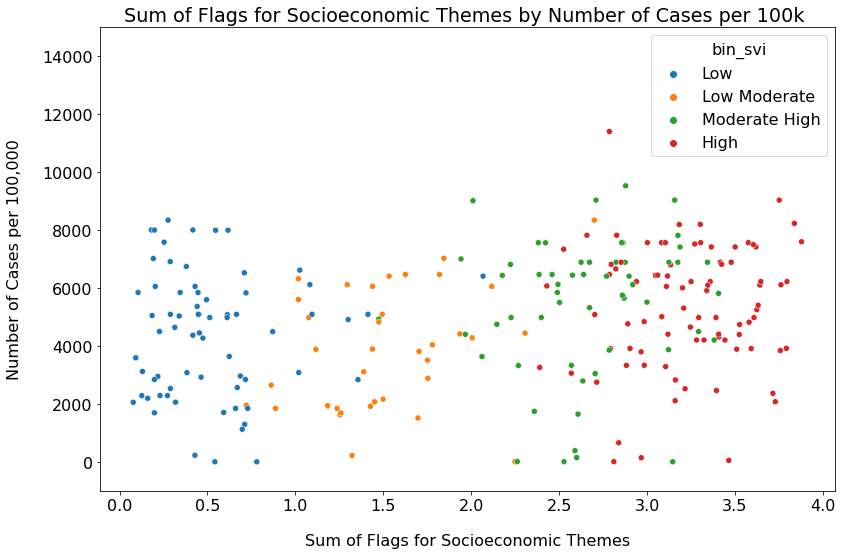

In [6]:
df, train_exp, X_train_scaled, y_train, X_test_scaled, y_test = wrangle.wrangle_dallas_data()
plt.figure(figsize=(12,8))
sns.scatterplot(x='spl_theme1', 
                y= 'tract_cases_per_100k',
                data = train_exp, hue='bin_svi',
                legend = True)
plt.rc('font', size=16)
plt.title("Sum of Flags for Socioeconomic Themes by Number of Cases per 100k ")
plt.ylabel('Number of Cases per 100,000',labelpad=20)
plt.xlabel('Sum of Flags for Socioeconomic Themes',labelpad=20)
plt.ylim([-1000, 15000])
plt.tight_layout()
plt.show()


#### Correlation spl_theme1

In [7]:
x = train_exp.spl_theme1
y = train_exp.tract_cases_per_100k
explore.r2(x,y)

0.05696058329529423

***

#### Scatterplot ep_pov

Acquire: compiling raw data files...
Acquire: Completed!
Prepare: preparing data files...
Prepare: Completed!
(289, 40) (73, 40)


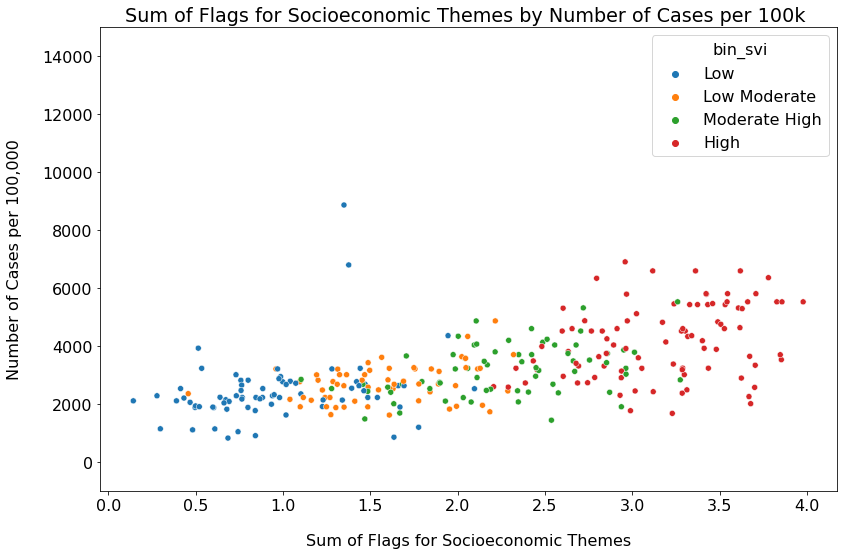

In [8]:
df, train_exp, X_train_scaled, y_train, X_test_scaled, y_test = wrangle.wrangle_data()
plt.figure(figsize=(12,8))
sns.scatterplot(x='spl_theme1', 
                y= 'tract_cases_per_100k',
                data = train_exp, hue='bin_svi',
                legend = True)
plt.rc('font', size=16)
plt.title("Sum of Flags for Socioeconomic Themes by Number of Cases per 100k ")
plt.ylabel('Number of Cases per 100,000',labelpad=20)
plt.xlabel('Sum of Flags for Socioeconomic Themes',labelpad=20)
plt.ylim([-1000, 15000])
plt.tight_layout()
plt.show()

#### Correlation ep_pov

In [9]:
x = train_exp.ep_pov
y = train_exp.tract_cases_per_100k
explore.r2(x,y)

0.21687699990784182

***

#### Scatterplot e_pov

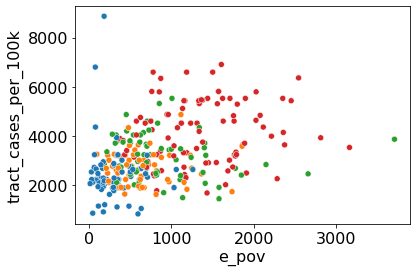

In [10]:
sns.scatterplot(x='e_pov', y= 'tract_cases_per_100k',
               data = train_exp, hue='bin_svi',legend = False)
plt.title("")
plt.show()

#### Correlation e_pov

In [11]:
x = train_exp.e_pov
y = train_exp.tract_cases_per_100k
explore.r2(x,y)

0.13144180316156412

In [12]:
X_train_scaled

,raw_svi,f_pov_soci,f_unemp_soci,f_pci_soci,f_nohsdp_soci,f_age65_comp,f_age17_comp,f_disabl_comp,f_sngpnt_comp,f_minrty_status,...,r_trans_fall,f_soci_total_scaled,f_comp_total_scaled,f_status_total_scaled,f_trans_total_scaled,all_flags_total_scaled,rank_svi_scaled,spl_theme1_scaled,ep_pov_scaled,e_pov_scaled
289,0.4879,0,0,0,0,0,0,0,0,0,...,0,0.0,0.000000,0.0,0.000000,0.000000,0.666667,0.314335,0.122963,0.085405
200,0.6394,0,0,0,0,0,0,0,0,0,...,0,0.0,0.000000,0.0,0.333333,0.111111,0.333333,0.732179,0.370370,1.000000
69,0.6523,0,0,0,0,0,0,0,0,1,...,0,0.0,0.000000,0.5,0.333333,0.222222,0.333333,0.748188,0.277037,0.088649
29,0.0872,0,0,0,0,0,0,0,0,0,...,0,0.0,0.000000,0.0,0.000000,0.000000,1.000000,0.183032,0.032593,0.035405
12,0.9531,0,0,0,0,0,0,1,0,0,...,0,0.0,0.333333,0.0,0.000000,0.111111,0.000000,0.858528,0.463704,0.474054
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48,0.2296,0,0,0,0,0,0,0,0,0,...,1,0.0,0.000000,0.0,0.000000,0.000000,1.000000,0.509282,0.284444,0.104865
272,0.3706,0,0,0,0,0,1,0,0,0,...,0,0.0,0.333333,0.0,0.000000,0.111111,0.666667,0.403374,0.082963,0.174054
294,0.2266,0,0,0,0,0,0,0,0,0,...,0,0.0,0.000000,0.0,0.000000,0.000000,1.000000,0.336940,0.091852,0.140270
54,0.4626,0,0,0,0,0,0,0,1,0,...,1,0.0,0.333333,0.0,0.000000,0.111111,0.666667,0.532278,0.354074,0.466216


***

## Poverty Cluster

#### Elbow Method to estabolish k

   k        sse
0  1  35.748849
1  2  13.664196
2  3   8.691464
3  4   6.753261
4  5   5.754384
5  6   5.053868
6  7   4.511127
7  8   4.003479
8  9   3.621829


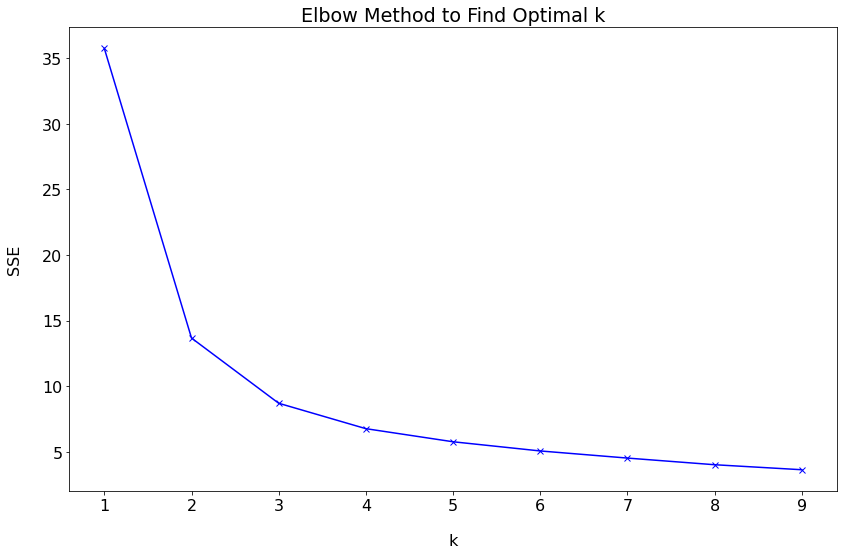

In [13]:
cluster_vars = ['spl_theme1_scaled', 'ep_pov_scaled', 'e_pov_scaled']
explore.elbow_plot(X_train_scaled, cluster_vars)

` k = 4 `

#### Create Clusters

In [14]:
train_clusters, kmeans = explore.run_kmeans(train_exp, X_train_scaled, k=4, cluster_vars=cluster_vars, cluster_col_name = 'poverty_cluster')
test_clusters = explore.kmeans_transform(X_test_scaled, kmeans, cluster_vars, cluster_col_name = 'poverty_cluster')

#### Get Centroids

In [15]:
centroids = explore.get_centroids(cluster_vars, cluster_col_name='poverty_cluster', kmeans= kmeans)

In [16]:
X_train_scaled.shape, X_test_scaled.shape, train_exp.shape

((289, 37), (73, 37), (289, 41))

#### Append Cluster and Join Centroids

In [17]:
train_exp = explore.add_to_train(train_clusters, centroids, train_exp, cluster_col_name = 'poverty_cluster')
X_train_scaled = explore.add_to_train(train_clusters, centroids, X_train_scaled, cluster_col_name = 'poverty_cluster')
X_test_scaled = explore.add_to_train(test_clusters, centroids, X_test_scaled, cluster_col_name = 'poverty_cluster')

In [18]:
X_train_scaled.shape, X_test_scaled.shape, train_exp.shape

((289, 41), (73, 41), (289, 45))

In [19]:
X_train_scaled.head()

,raw_svi,f_pov_soci,f_unemp_soci,f_pci_soci,f_nohsdp_soci,f_age65_comp,f_age17_comp,f_disabl_comp,f_sngpnt_comp,f_minrty_status,...,f_trans_total_scaled,all_flags_total_scaled,rank_svi_scaled,spl_theme1_scaled,ep_pov_scaled,e_pov_scaled,poverty_cluster,centroid_spl_theme1_scaled,centroid_ep_pov_scaled,centroid_e_pov_scaled
289,0.4879,0,0,0,0,0,0,0,0,0,...,0.000000,0.000000,0.666667,0.314335,0.122963,0.085405,3,0.221768,0.083420,0.087366
200,0.6394,0,0,0,0,0,0,0,0,0,...,0.333333,0.111111,0.333333,0.732179,0.370370,1.000000,2,0.860802,0.568366,0.552091
69,0.6523,0,0,0,0,0,0,0,0,1,...,0.333333,0.222222,0.333333,0.748188,0.277037,0.088649,1,0.734442,0.372531,0.308660
29,0.0872,0,0,0,0,0,0,0,0,0,...,0.000000,0.000000,1.000000,0.183032,0.032593,0.035405,3,0.221768,0.083420,0.087366
12,0.9531,0,0,0,0,0,0,1,0,0,...,0.000000,0.111111,0.000000,0.858528,0.463704,0.474054,2,0.860802,0.568366,0.552091


In [20]:
X_train_scaled, X_test_scaled = wrangle.scale_data_centroid(X_train_scaled, X_test_scaled)

In [21]:
X_test_scaled.head()

,raw_svi,f_pov_soci,f_unemp_soci,f_pci_soci,f_nohsdp_soci,f_age65_comp,f_age17_comp,f_disabl_comp,f_sngpnt_comp,f_minrty_status,...,all_flags_total_scaled,rank_svi_scaled,spl_theme1_scaled,ep_pov_scaled,e_pov_scaled,poverty_cluster,centroid_spl_theme1_scaled,centroid_ep_pov_scaled,centroid_e_pov_scaled,poverty_cluster_scaled
274,0.5190,0,0,0,0,0,1,0,1,0,...,0.222222,0.333333,0.476482,0.091852,0.228378,0,0.485914,0.217179,0.180188,0.000000
23,0.4290,0,0,0,0,0,0,0,0,0,...,0.000000,0.666667,0.394014,0.229630,0.149189,0,0.485914,0.217179,0.180188,0.000000
224,0.9265,0,0,0,0,0,0,1,0,0,...,0.222222,0.000000,0.788705,0.426667,0.388108,1,0.734442,0.372531,0.308660,0.333333
128,0.8606,0,1,1,0,0,0,1,0,0,...,0.333333,0.000000,0.916462,0.459259,0.408378,2,0.860802,0.568366,0.552091,0.666667
258,0.8205,0,0,0,0,0,0,0,0,0,...,0.000000,0.000000,0.676279,0.277037,0.328378,1,0.734442,0.372531,0.308660,0.333333


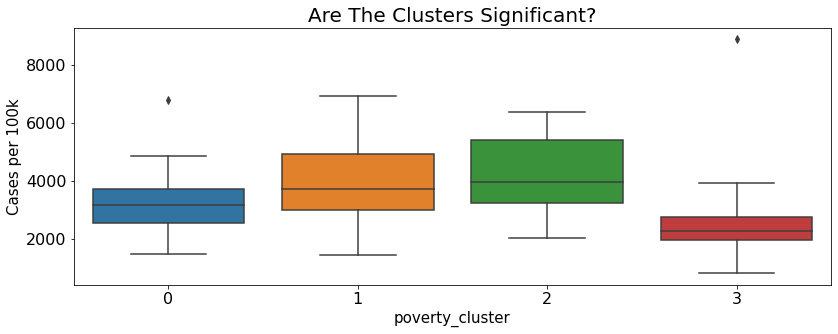

In [22]:
plt.rcParams['figure.figsize'] = (15.0, 8.0)
sns.boxplot(train_exp.poverty_cluster, train_exp.tract_cases_per_100k)
plt.xlabel("poverty_cluster", fontsize=15 )
plt.ylabel("Cases per 100k", fontsize=15)
plt.title("Are The Clusters Significant?",fontsize=20)
plt.tight_layout(pad =8)
#plt.ylim(.55,.61)
plt.show()

In [23]:
train_exp.head(1)

,tract,e_pov,ep_pov,spl_theme1,raw_svi,f_pov_soci,f_unemp_soci,f_pci_soci,f_nohsdp_soci,f_soci_total,...,r_status_rise,r_trans_rise,r_soci_fall,r_comp_fall,r_status_fall,r_trans_fall,poverty_cluster,centroid_spl_theme1_scaled,centroid_ep_pov_scaled,centroid_e_pov_scaled
289,48029181821,328,8.8,1.348,0.4879,0,0,0,0,0,...,0,0,0,0,0,0,3,0.221768,0.08342,0.087366


In [24]:
# def sns_boxplot_hypothesis(dfx, dfy, xlabel, ylabel, title):
#     '''create boxplot for hypothesis test exploration
#     '''
#     plt.figure(figsize=(12,8))
#     plt.rc('font', size=16)
#     sns.boxplot(x= dfx, y=dfy)
#     plt.title(title)
#     plt.xlabel(xlabel,labelpad=20)
#     plt.ylabel(ylabel,labelpad=20)
#     plt.ylim([-100, 10000])
#     plt.tight_layout()
#     plt.show()
    
    

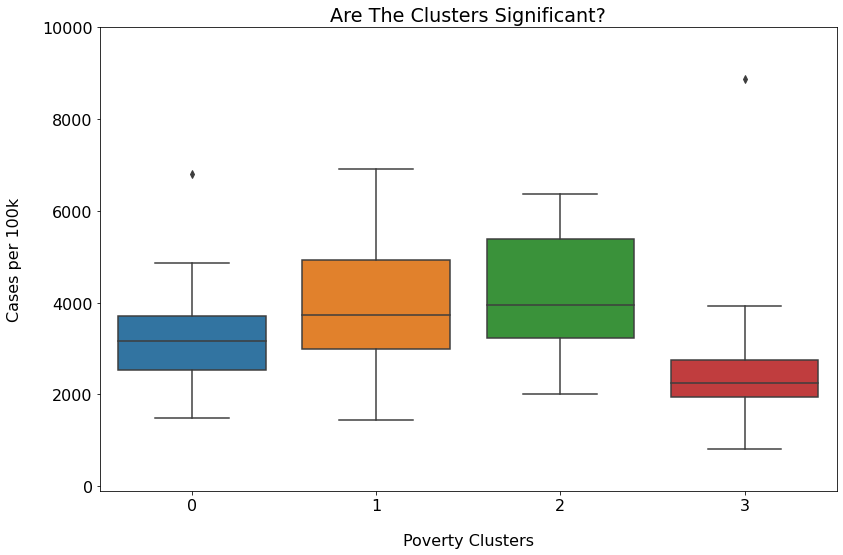

In [25]:
explore.sns_boxplot_hypothesis(train_exp.poverty_cluster, 
                       train_exp.tract_cases_per_100k, 
                       "Poverty Clusters", 
                       "Cases per 100k", 
                       "Are The Clusters Significant?")